<div style="text-align:center;">
    <div style="
        background-color:#1f6feb;
        color:white;
        padding:14px 24px;
        border-radius:10px;
        font-size:24px;
        font-weight:700;
        width:fit-content;
        margin:0 auto;
        box-shadow:0 4px 10px rgba(0,0,0,0.25);
    ">
        🌤️ Weather Temperature Prediction using Linear Regression
    </div>
</div>

---

This project predicts the temperature (°C) from weather features using a Linear Regression model.
It includes data preprocessing, feature engineering, training, validation, and evaluation.
## 1. Environment Setup
### 1.1 Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 2. Data Loading and Exploration
### 2.1 Load Dataset

In [2]:
df= pd.read_csv("/kaggle/input/weather-dataset/weatherHistory.csv")
print("Shape: ",df.shape)
df.head()

Shape:  (96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### 2.2 Basic Information and Statistics

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## 3. Data Cleaning and Preprocessing
### 3.1 Handle Missing Values and Duplicates

In [4]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [5]:
df['Precip Type']=df['Precip Type'].fillna('none')
df.drop_duplicates()
print("Missnig value after cleaning :",df.isnull().sum())

Missnig value after cleaning : Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


### 3.2 Select Useful Features

In [6]:
features=[
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Pressure (millibars)',
    'Precip Type'
]
X=df[features.copy()]
y=df['Temperature (C)']

## 4. Feature Engineering
### 4.1 Encode Categorical Feature (Precip Type)

In [7]:
print(df['Precip Type'].unique())

['rain' 'snow' 'none']


## Convert Precip Type to Numbers

In [8]:
precip_map={'rain':1,'snow':2,'none':0}
X['Precip Type']=X['Precip Type'].map(precip_map)
print(X['Precip Type'].value_counts())

Precip Type
1    85224
2    10712
0      517
Name: count, dtype: int64


### 4.2 Handle Wind Direction (Convert to sin/cos)

In [9]:
X['wind_sin'] = np.sin(np.radians(X['Wind Bearing (degrees)']))
X['wind_cos'] = np.cos(np.radians(X['Wind Bearing (degrees)']))
X = X.drop('Wind Bearing (degrees)', axis=1)

### Final Feature List

In [10]:
print("Final features:",X.columns)

Final features: Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Visibility (km)', 'Pressure (millibars)', 'Precip Type', 'wind_sin',
       'wind_cos'],
      dtype='object')


## 5. Data Splitting and Scaling
### 5.1 Train–Validation–Test Split

In [11]:

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)


### 5.2 Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_val_scaled = scaler.transform(X_train_val)

## 6. Model Training and Cross-Validation
### 6.1 Train Model with Increasing Data (Learning Curve Setup)

In [13]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_mae_list = []
val_mae_list = []

print("Training with increasing data size using cross-validation...")

for frac in train_sizes:
    n = int(frac * len(X_train_scaled))
    X_part = X_train_scaled[:n]
    y_part = y_train[:n]

    model = LinearRegression()


    scores = cross_val_score(
        model,
        X_part,
        y_part,
        cv=5,
        scoring='neg_mean_absolute_error'
    )

    val_mae = -np.mean(scores)
    val_mae_list.append(val_mae)


    model.fit(X_part, y_part)
    y_pred_train = model.predict(X_part)
    train_mae = mean_absolute_error(y_part, y_pred_train)
    train_mae_list.append(train_mae)

    print(f"Data: {frac*100:>3.0f}% | Train MAE: {train_mae:.3f} | Val MAE (CV): {val_mae:.3f}")


Training with increasing data size using cross-validation...
Data:  10% | Train MAE: 0.741 | Val MAE (CV): 0.742
Data:  20% | Train MAE: 0.740 | Val MAE (CV): 0.741
Data:  30% | Train MAE: 0.740 | Val MAE (CV): 0.741
Data:  40% | Train MAE: 0.739 | Val MAE (CV): 0.739
Data:  50% | Train MAE: 0.738 | Val MAE (CV): 0.739
Data:  60% | Train MAE: 0.737 | Val MAE (CV): 0.737
Data:  70% | Train MAE: 0.739 | Val MAE (CV): 0.739
Data:  80% | Train MAE: 0.740 | Val MAE (CV): 0.740
Data:  90% | Train MAE: 0.740 | Val MAE (CV): 0.740
Data: 100% | Train MAE: 0.741 | Val MAE (CV): 0.741


## 7. Model Performance Visualization
### 7.1 Learning Curve Plot

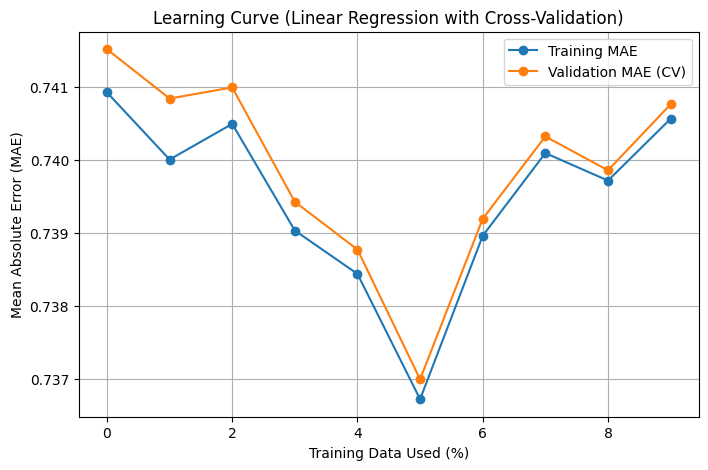

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(train_mae_list, 'o-', label='Training MAE')
plt.plot(val_mae_list, 'o-', label='Validation MAE (CV)')
plt.title('Learning Curve (Linear Regression with Cross-Validation)')
plt.xlabel('Training Data Used (%)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

### 7.2 Loss Curve Visualization (Using Gradient Descent)

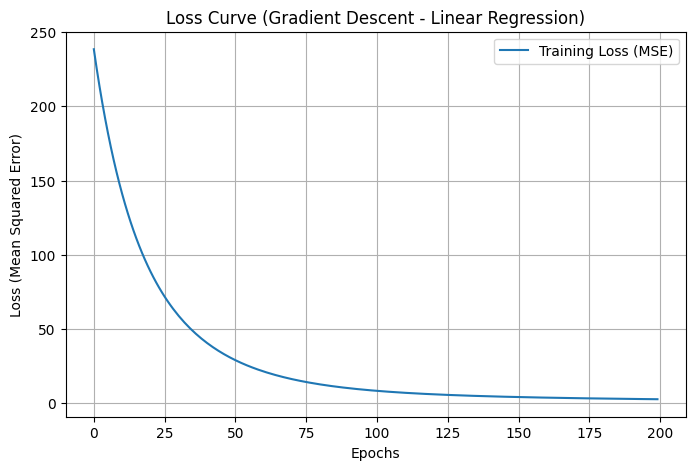

In [15]:
X_gd = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
y_gd = y_train.values.reshape(-1, 1)

theta = np.random.randn(X_gd.shape[1], 1)
learning_rate = 0.01
n_epochs = 200

loss_list = []

for epoch in range(n_epochs):
    y_pred = X_gd.dot(theta)
    error = y_pred - y_gd
    mse = np.mean(error ** 2)
    loss_list.append(mse)
    gradients = 2 / len(X_gd) * X_gd.T.dot(error)
    theta -= learning_rate * gradients

plt.figure(figsize=(8, 5))
plt.plot(range(n_epochs), loss_list, label='Training Loss (MSE)')
plt.title('Loss Curve (Gradient Descent - Linear Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Model Evaluation
### 8.1 Predict on Test Data

In [16]:
y_pred = model.predict(X_test_scaled)

### 8.2 Compute Evaluation Metrics

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.74
MSE: 0.90
RMSE: 0.95
R² Score: 0.990


### 8.3 Actual vs Predicted Visualization

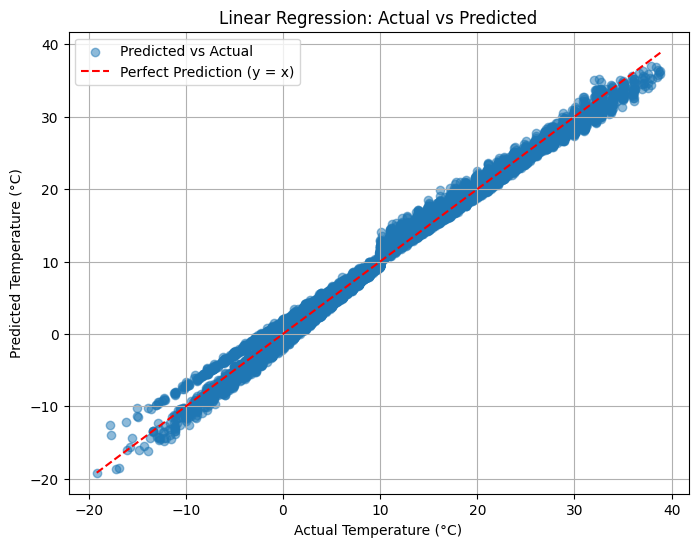

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label='Perfect Prediction (y = x)'
)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


## 9. Feature Importance Analysis
### 9.1 Coefficient Magnitude Plot

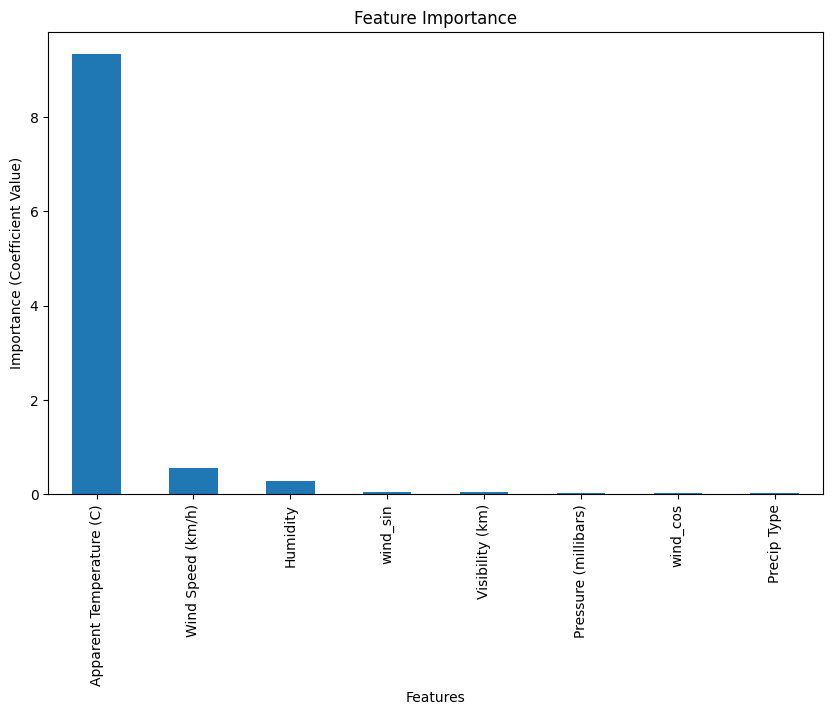

In [19]:


coef = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Importance (Coefficient Value)')
plt.title('Feature Importance')
plt.show()

## 10. Sample Predictions
### 10.1 Display Example Predictions

In [20]:



print("\nSample Predictions:")
sample = pd.DataFrame({
    'Actual': y_test.values[:5].round(2),
    'Predicted': y_pred[:5].round(2)
})
sample['Error'] = (sample['Actual'] - sample['Predicted']).round(2)
print(sample)


Sample Predictions:
   Actual  Predicted  Error
0   28.12      28.10   0.02
1   10.00       9.64   0.36
2   14.40      15.22  -0.82
3    1.02       0.07   0.95
4   -0.12      -0.18   0.06
